In [1]:
print("""

Earlham College Team
---------------------------------------------

Bach Pham (Vietnam)               - Freshman

Samadhi Chandrasena (Australia)   - Junior

Sora Owada (Japan)                - Sophomore



""")



Earlham College Team
---------------------------------------------

Bach Pham (Vietnam)               - Freshman

Samadhi Chandrasena (Australia)   - Junior

Sora Owada (Japan)                - Sophomore






In [2]:
import numpy as np
from sklearn.metrics import roc_auc_score
import tensorflow as tf
import cv2
import os

def load_test_data(image_dir, label_file):
    image_files = []
    labels = []
    
    with open(label_file, 'r') as f:
        for line in f:
            parts = line.strip().split()
            image_name = parts[0]
            label = [int(x) for x in parts[1:]]
            
            img_path = os.path.join(image_dir, image_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (245, 245))
            img = img.astype('float32') / 255.0
            
            image_files.append(img)
            labels.append(label)
    
    return np.array(image_files)[..., np.newaxis], np.array(labels)

# Load test data and model
print("Loading test data...")
X_test, y_test = load_test_data('Cxnet_set', 'labels/test_list.txt')
print("Loading model...")
model = tf.keras.models.load_model('best_EC_team_model.h5')

# Predict in batches
print("Making predictions...")
BATCH_SIZE = 32
n_samples = len(X_test)
y_pred = []

for i in range(0, n_samples, BATCH_SIZE):
    batch_x = X_test[i:i + BATCH_SIZE]
    batch_pred = model.predict(batch_x, verbose=0)
    y_pred.append(batch_pred)

y_pred = np.vstack(y_pred)

# print AUROC for each class
print("\nAUROC Scores per Class:")
print("-" * 30)
auroc_scores = []
for i in range(14):
    try:
        score = roc_auc_score(y_test[:, i], y_pred[:, i])
        auroc_scores.append(score)
        print(f"Class {i:2d}: {score:.4f}")
    except ValueError as e:
        print(f"Class {i:2d}: Unable to calculate")

# average AUROC ~ accuracy
average_auroc = np.mean(auroc_scores)
print(f"\nAverage AUROC (Overall Accuracy): {average_auroc:.4f}")


Loading test data...
Loading model...
Making predictions...

AUROC Scores per Class:
------------------------------
Class  0: 0.7503
Class  1: 0.8601
Class  2: 0.8615
Class  3: 0.6796
Class  4: 0.7270
Class  5: 0.6530
Class  6: 0.7105
Class  7: 0.8200
Class  8: 0.7724
Class  9: 0.8755
Class 10: 0.8354
Class 11: 0.7742
Class 12: 0.7196
Class 13: 0.8307

Average AUROC (Overall Accuracy): 0.7764


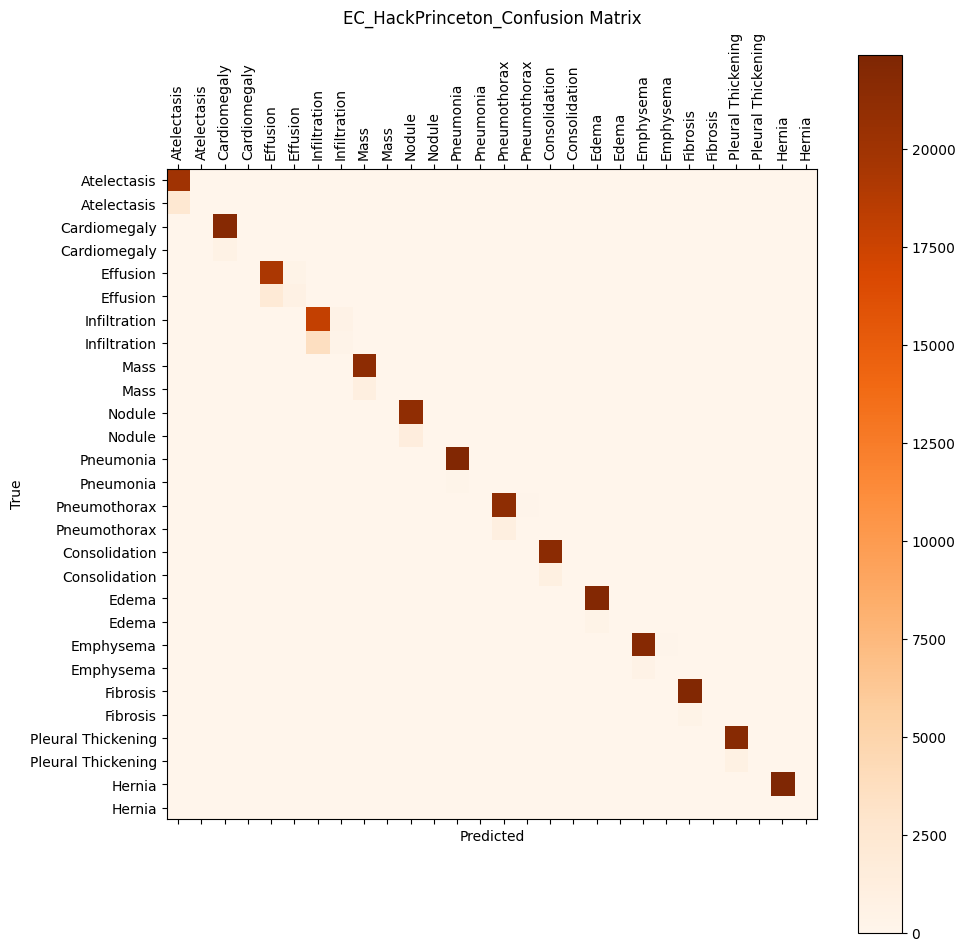

Confusion matrix has been saved and displayed :)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_and_save_combined_confusion_matrix(y_true, y_pred, class_names):
    combined_cm = np.zeros((2 * len(class_names), 2 * len(class_names)))

    for i, class_name in enumerate(class_names):
        single_cm = confusion_matrix(y_true[:, i], (y_pred[:, i] > 0.5).astype(int))
        combined_cm[i*2:(i+1)*2, i*2:(i+1)*2] = single_cm

    fig, ax = plt.subplots(figsize=(10, 10))
    cax = ax.matshow(combined_cm, cmap='Oranges')
    fig.colorbar(cax)

    ax.set_xticks(np.arange(len(class_names) * 2))
    ax.set_yticks(np.arange(len(class_names) * 2))
    ax.set_xticklabels([class_name for class_name in class_names for _ in range(2)], rotation=90)
    ax.set_yticklabels([class_name for class_name in class_names for _ in range(2)])
    ax.set_title("EC_HackPrinceton_Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

    # save
    plt.tight_layout()
    plt.savefig("EC_Best_HackPrinceton_Confusion_matrix.png")
    
    # show
    plt.show()
    plt.close()

class_names = [
    "Atelectasis", "Cardiomegaly", "Effusion", "Infiltration", "Mass",
    "Nodule", "Pneumonia", "Pneumothorax", "Consolidation", "Edema",
    "Emphysema", "Fibrosis", "Pleural Thickening", "Hernia"
]

plot_and_save_combined_confusion_matrix(y_test, y_pred, class_names)
print("Confusion matrix has been saved and displayed :)")
